In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'].fillna(df['Age'].mode()[0],inplace=True)

C:\Users\saich\AppData\Local\Temp\ipykernel_11320\797653428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0],inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Sex']=df['Sex'].map({
    'male':1,'female':0})

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\saich\AppData\Local\Temp\ipykernel_11320\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [11]:
df['Embarked']=df['Embarked'].map({ 'S':0,'C':1,'Q':2})

In [12]:
df['Embarked']=df['Embarked'].astype(int)
df.Sex=df.Sex.astype(int)

In [13]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,0


In [14]:
X=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y=df.Survived

<Axes: xlabel='Survived', ylabel='Count'>

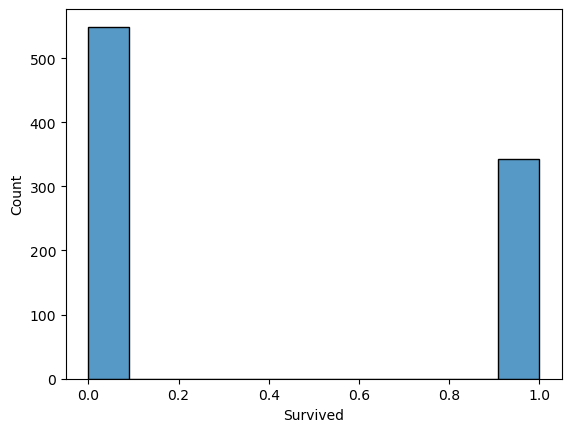

In [98]:
sns.histplot(y)

<Axes: >

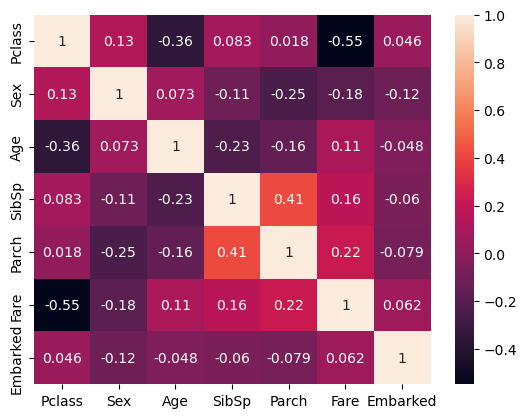

In [15]:
sns.heatmap(X.corr(),annot=True)


In [16]:
sc=StandardScaler()

In [17]:
X_scaled=sc.fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=20,test_size=0.2)

In [65]:
X_train.shape

(712, 7)

In [78]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)



In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,ypred)

0.8100558659217877

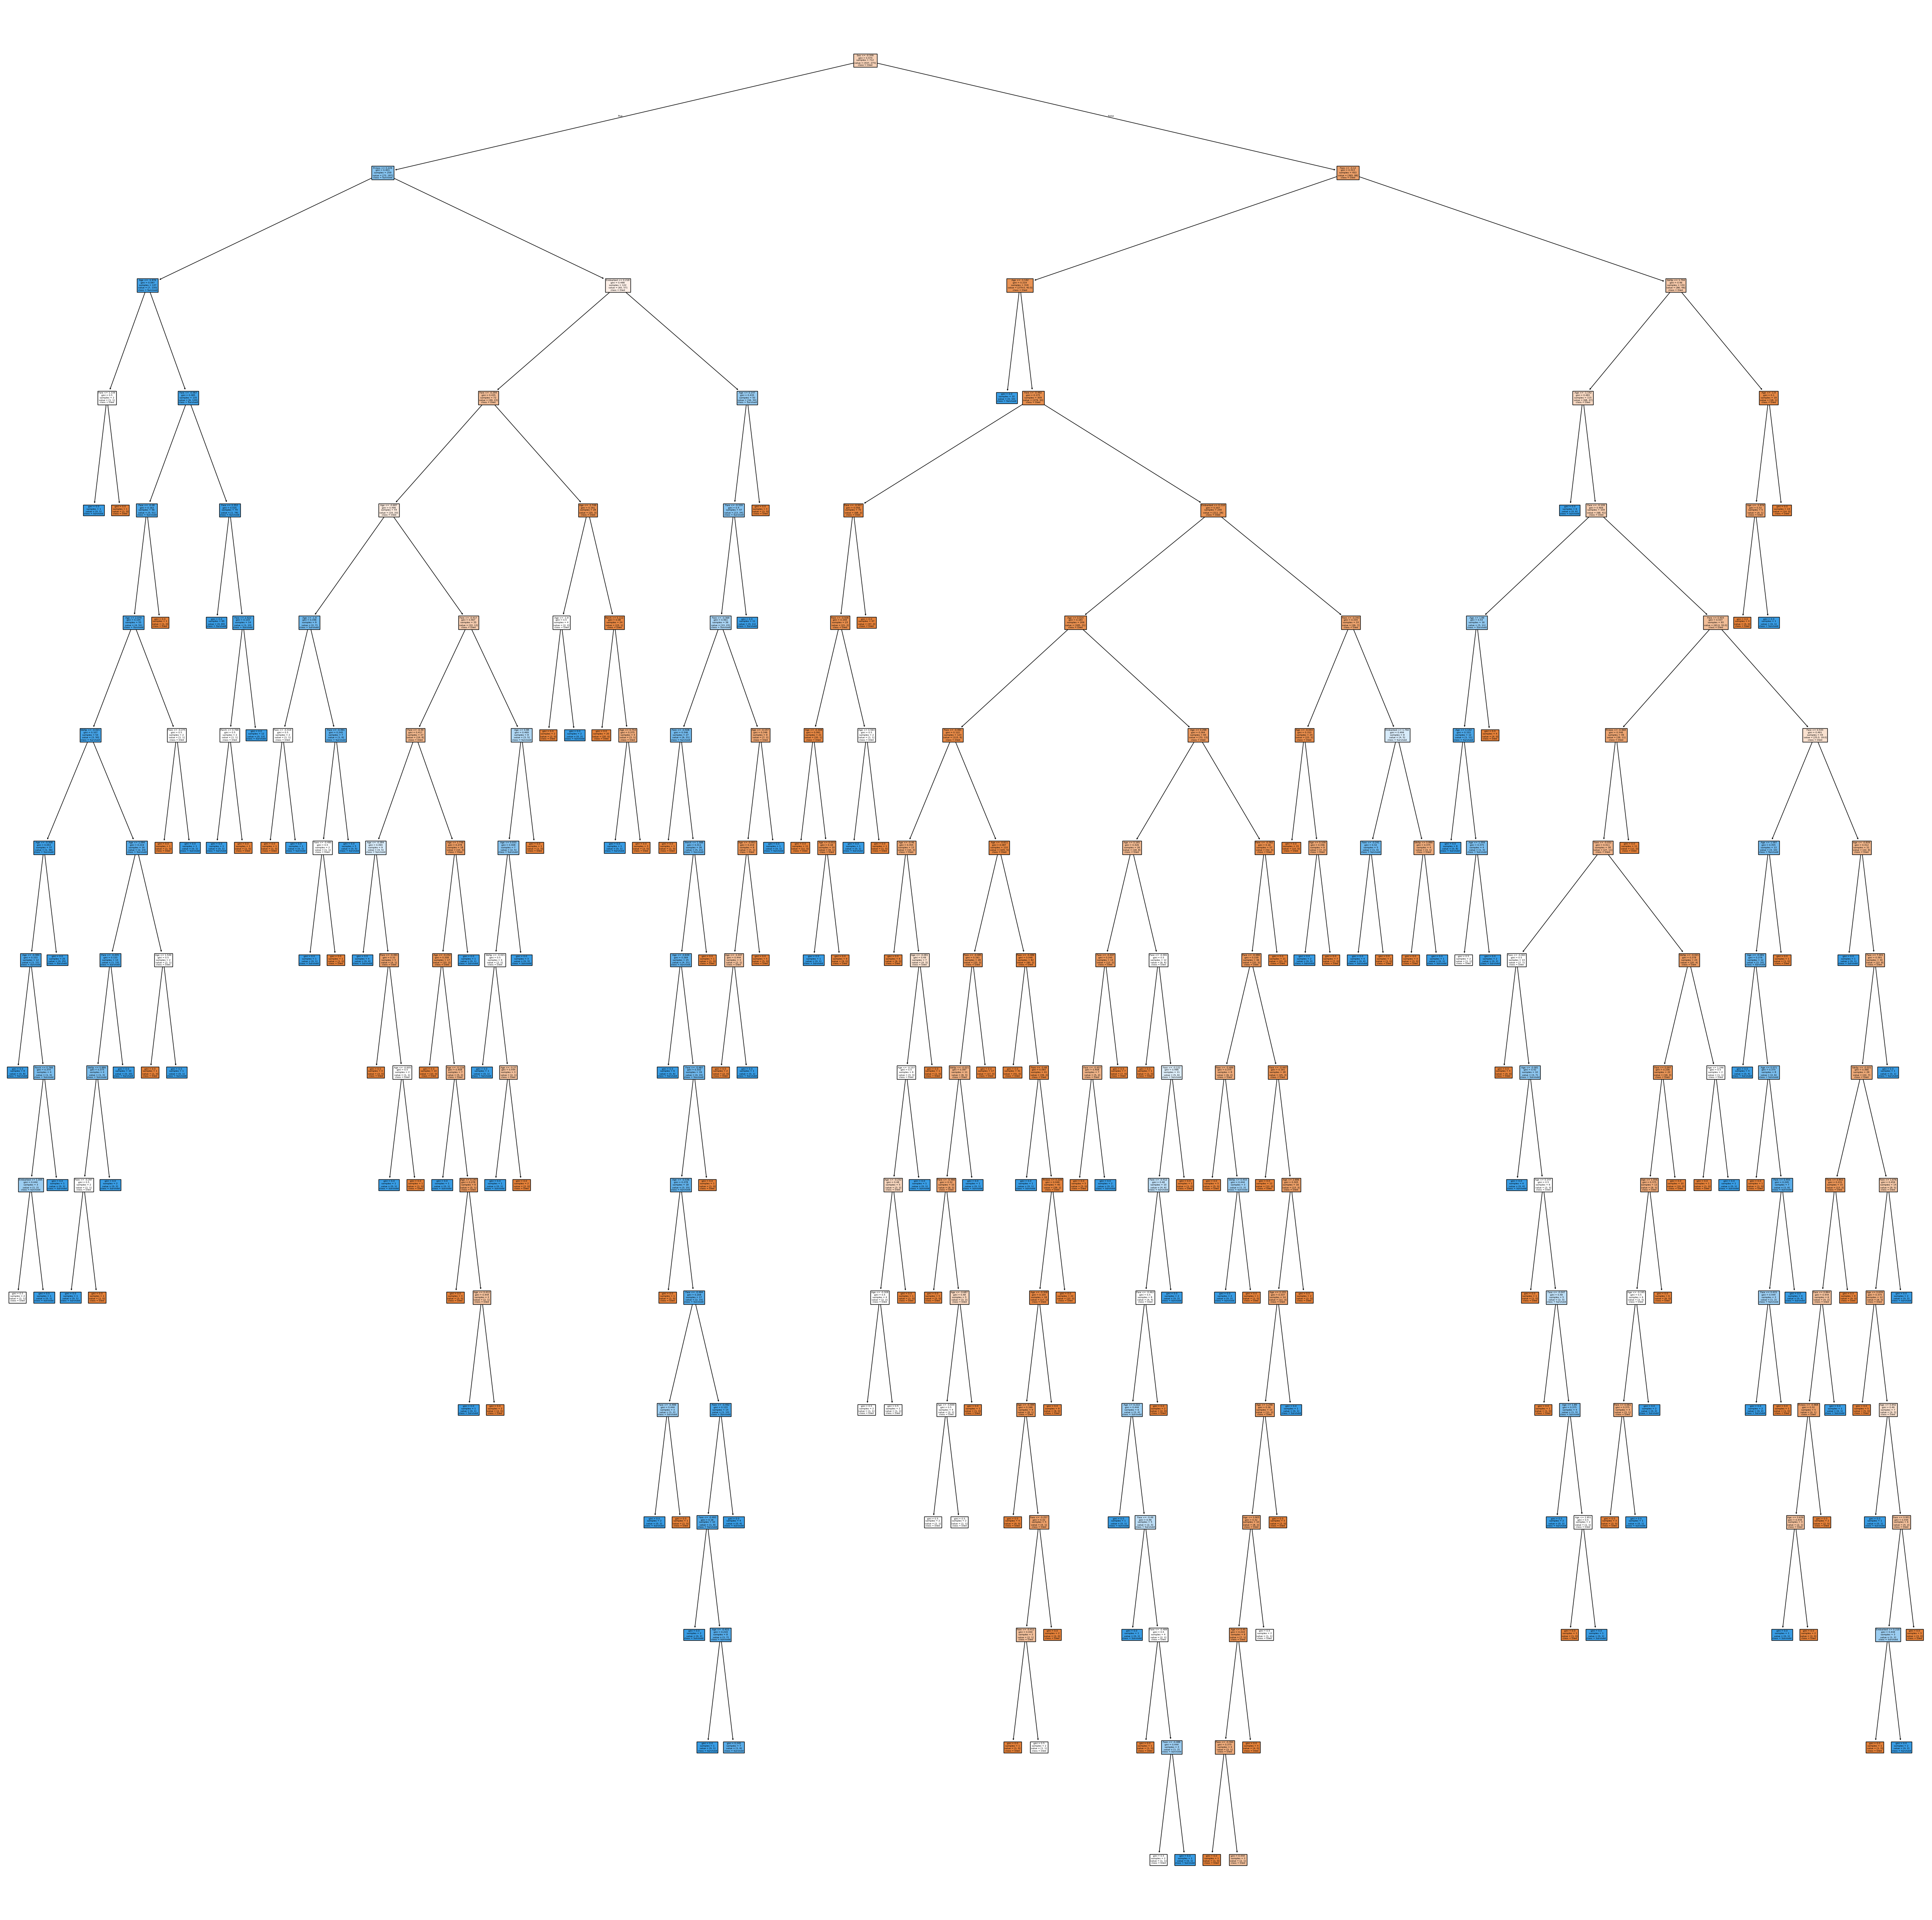

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,60))
plot_tree(classifier, feature_names=X.columns, class_names=["Died","Survived"], filled=True)
plt.show()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.77      0.70      0.73        67

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)
accuracy_score(y_test,ypred)

0.8212290502793296

<Axes: >

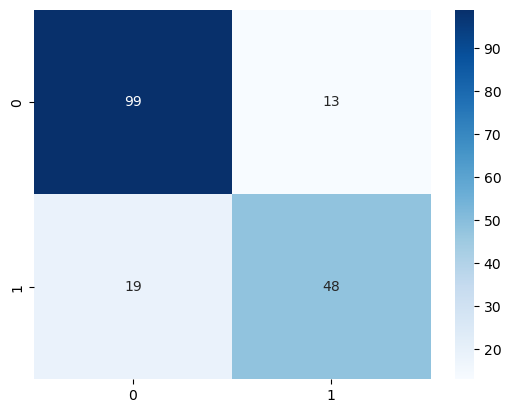

In [63]:

sns.heatmap(confusion_matrix(y_test,ypred),annot=True,cmap='Blues')